# Commercial Data Science
## 1. Data Import & Cleaning

In [67]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
pd.options.display.max_rows = 200

In [2]:
df = pd.read_csv('./data/data.csv', sep=';', skip_blank_lines=True).drop(columns=['Unnamed: 15', 'Unnamed: 16']).dropna(how='all')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [4]:
columns = ['date', 'time', 'co_gt', 'co_co', 'nmhc_gt', 'c6h6_gt', 'nmhc_pts', 'nox_gt', 'nox_pts', 'no2_gt', 'no2_pts', 'o3_pts', 't', 'rh', 'ah']
df.columns = columns
df.head()

,date,time,co_gt,co_co,nmhc_gt,c6h6_gt,nmhc_pts,nox_gt,nox_pts,no2_gt,no2_pts,o3_pts,t,rh,ah
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [5]:
df.co_gt = df.co_gt.str.replace(',', '.')
df.c6h6_gt = df.c6h6_gt.str.replace(',', '.')
df.t = df.t.str.replace(',', '.')
df.rh = df.rh.str.replace(',', '.')
df.ah = df.ah.str.replace(',', '.')
df.time = df.time.str.replace('.', ':')

In [6]:
float_cols = ['co_gt', 'c6h6_gt', 't', 'rh', 'ah']
df = df.astype({x : "float" for x in float_cols})

In [7]:
df['datetime'] = pd.to_datetime(df.date + " " + df.time)

In [8]:
df= df.drop(columns=['date', 'time'])

In [9]:
df = df.sort_values('datetime').reset_index(drop=True)

In [10]:
df[df.duplicated()].count().sum()

0

In [11]:
df[df.isna()].count().sum()

0

## 1. Max Temp recorded in 2004

In [12]:
df[(df.datetime.dt.month == 5) & (df.datetime.dt.year == 2004)].t.max()

40.4

# 2. Most common day & Highest Recording of NOX

In [13]:
nox = df.sort_values('nox_gt', ascending=False).nlargest(10, columns='nox_gt')
nox

,co_gt,co_co,nmhc_gt,c6h6_gt,nmhc_pts,nox_gt,nox_pts,no2_gt,no2_pts,o3_pts,t,rh,ah,datetime
6672,9.9,1881.0,-200.0,50.8,1983.0,1479.0,334.0,269.0,2271.0,2523.0,12.6,55.9,0.8142,2004-12-13 18:00:00
6312,10.1,1956.0,-200.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,2004-11-26 18:00:00
6241,11.9,2008.0,-200.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,2004-11-23 19:00:00
6240,10.2,1982.0,-200.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,2004-11-23 18:00:00
6242,11.5,1918.0,-200.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,2004-11-23 20:00:00
6217,6.9,1766.0,-200.0,37.6,1720.0,1345.0,361.0,245.0,1881.0,2515.0,9.1,53.8,0.6216,2004-11-22 19:00:00
6696,9.3,-200.0,-200.0,-200.0,-200.0,1310.0,-200.0,248.0,-200.0,-200.0,-200.0,-200.0,-200.0000,2004-12-14 18:00:00
6216,6.3,1738.0,-200.0,38.3,1735.0,1301.0,365.0,240.0,1917.0,2434.0,8.9,53.4,0.6117,2004-11-22 18:00:00
6095,7.8,1659.0,-200.0,35.9,1685.0,1290.0,423.0,272.0,1946.0,2155.0,16.0,41.5,0.7483,2004-11-17 17:00:00
6746,9.1,-200.0,-200.0,-200.0,-200.0,1253.0,-200.0,219.0,-200.0,-200.0,-200.0,-200.0,-200.0000,2004-12-16 20:00:00


In [14]:
nox.sort_values('nox_gt', ascending=False).iloc[0:10].datetime.dt.day.value_counts()

23    3
22    2
14    1
13    1
26    1
17    1
16    1
Name: datetime, dtype: int64

In [15]:
nox.sort_values('nox_gt', ascending=False).iloc[0:10].datetime.dt.weekday.value_counts()

1    4
0    3
4    1
3    1
2    1
Name: datetime, dtype: int64

## 3. Total NO2

In [16]:
df[(df.datetime.dt.month == 12) & (df.datetime.dt.year == 2005)].no2_gt.sum()

11103.0

# 4. Absolute Humidity - lowest Average

In [17]:
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour

In [18]:
df.head()

,co_gt,co_co,nmhc_gt,c6h6_gt,nmhc_pts,nox_gt,nox_pts,no2_gt,no2_pts,o3_pts,t,rh,ah,datetime,year,month,day,hour
0,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593,2004-01-04 00:00:00,2004,1,4,0
1,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652,2004-01-04 01:00:00,2004,1,4,1
2,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630,2004-01-04 02:00:00,2004,1,4,2
3,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394,2004-01-04 03:00:00,2004,1,4,3
4,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299,2004-01-04 04:00:00,2004,1,4,4


In [19]:
ah = df[['year', 'month', 'hour', 'ah']].groupby(['year', 'month', 'hour']).mean().reset_index()
ah

,year,month,hour,ah
0,2004,1,0,1.432278
1,2004,1,1,1.419078
2,2004,1,2,1.429633
3,2004,1,3,1.430444
4,2004,1,4,1.422211
...,...,...,...,...
571,2005,12,19,0.802167
572,2005,12,20,0.822033
573,2005,12,21,0.826833
574,2005,12,22,0.800933


In [20]:
ah.sort_values('ah').head()

,year,month,hour,ah
539,2005,11,11,-133.028567
384,2005,5,0,-66.325600
377,2005,4,17,-66.325333
383,2005,4,23,-66.321800
376,2005,4,16,-66.320733


# 5. CO2 Concentration Prediction - Correlations

In [21]:
df

,co_gt,co_co,nmhc_gt,c6h6_gt,nmhc_pts,nox_gt,nox_pts,no2_gt,no2_pts,o3_pts,t,rh,ah,datetime,year,month,day,hour
0,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593,2004-01-04 00:00:00,2004,1,4,0
1,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652,2004-01-04 01:00:00,2004,1,4,1
2,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630,2004-01-04 02:00:00,2004,1,4,2
3,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394,2004-01-04 03:00:00,2004,1,4,3
4,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299,2004-01-04 04:00:00,2004,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.8,1177.0,-200.0,7.5,878.0,289.0,641.0,152.0,1224.0,844.0,14.0,47.8,0.7582,2005-12-03 19:00:00,2005,12,3,19
9353,2.4,1383.0,-200.0,14.1,1119.0,550.0,522.0,201.0,1415.0,1310.0,13.2,51.4,0.7760,2005-12-03 20:00:00,2005,12,3,20
9354,3.3,1363.0,-200.0,12.4,1064.0,679.0,536.0,221.0,1350.0,1353.0,12.0,56.1,0.7832,2005-12-03 21:00:00,2005,12,3,21
9355,0.9,1087.0,-200.0,5.8,803.0,314.0,699.0,157.0,1130.0,907.0,11.6,54.7,0.7454,2005-12-03 22:00:00,2005,12,3,22


In [22]:
df = df.sort_values('datetime').reset_index(drop=True).set_index('datetime')

In [23]:
df['target'] = df.shift(-1).co_gt
df.head()

,co_gt,co_co,nmhc_gt,c6h6_gt,nmhc_pts,nox_gt,nox_pts,no2_gt,no2_pts,o3_pts,t,rh,ah,year,month,day,hour,target
datetime,,,,,,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593,2004,1,4,0,1.2
2004-01-04 01:00:00,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652,2004,1,4,1,1.1
2004-01-04 02:00:00,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630,2004,1,4,2,0.9
2004-01-04 03:00:00,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394,2004,1,4,3,0.7
2004-01-04 04:00:00,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299,2004,1,4,4,0.9


In [47]:
df.to_csv('./clean.csv')

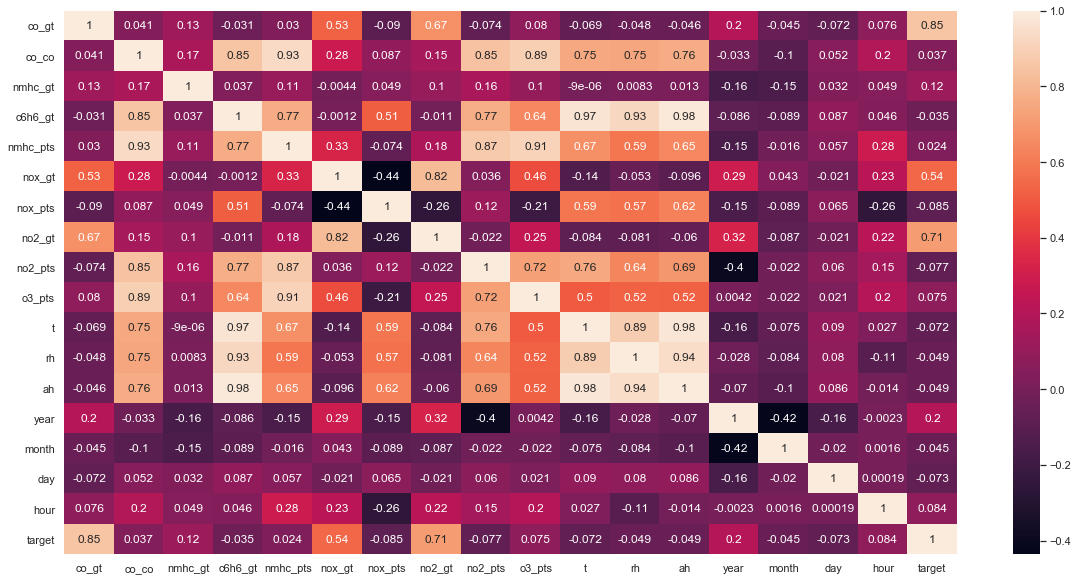

In [43]:
corr = df.corr()
sb.set(rc={'figure.figsize':(20,10)})
sb.heatmap(corr, annot=True)

In [61]:
valid_cols = df.drop(columns=['year', 'month', 'day', 'hour']).columns

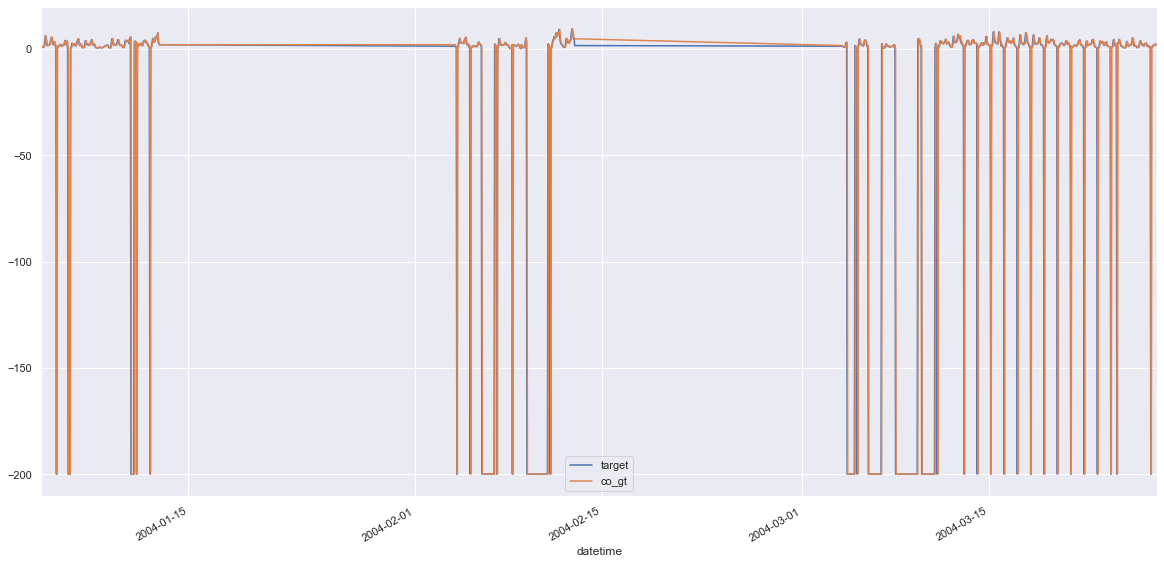

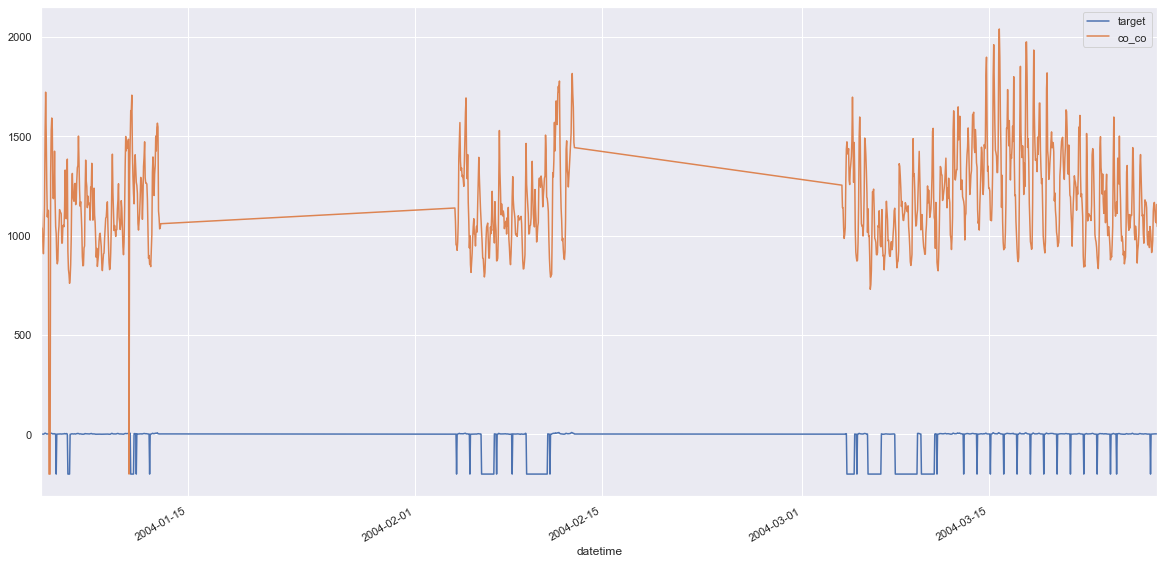

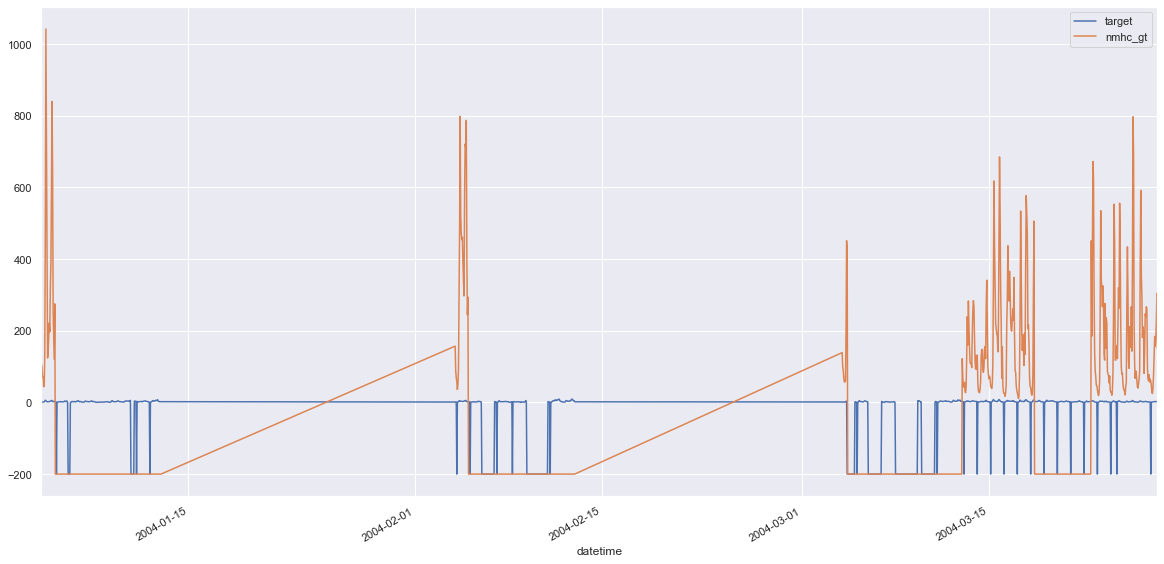

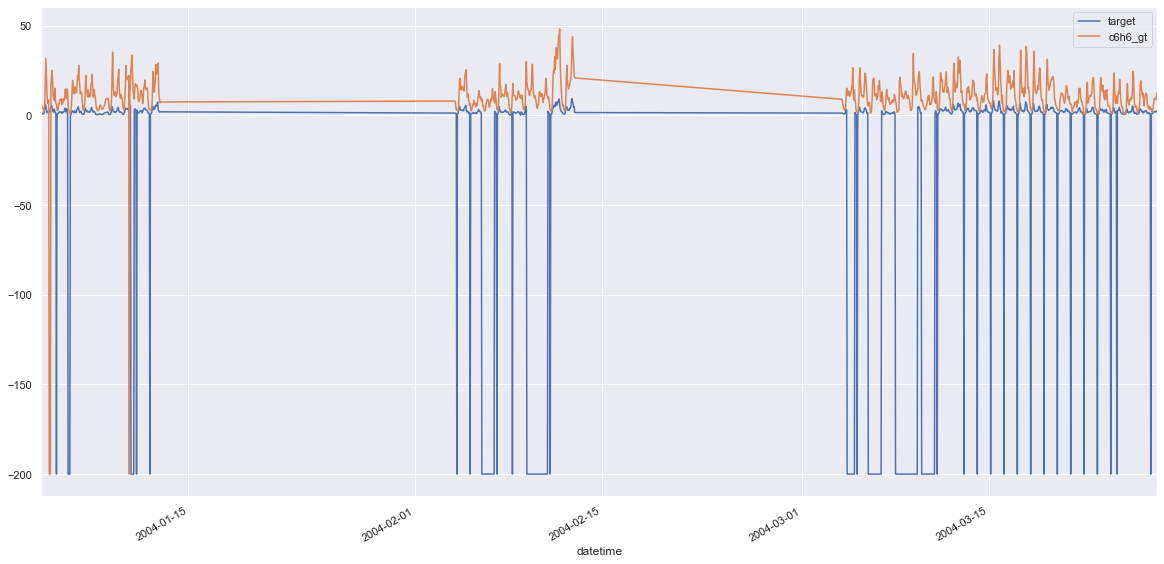

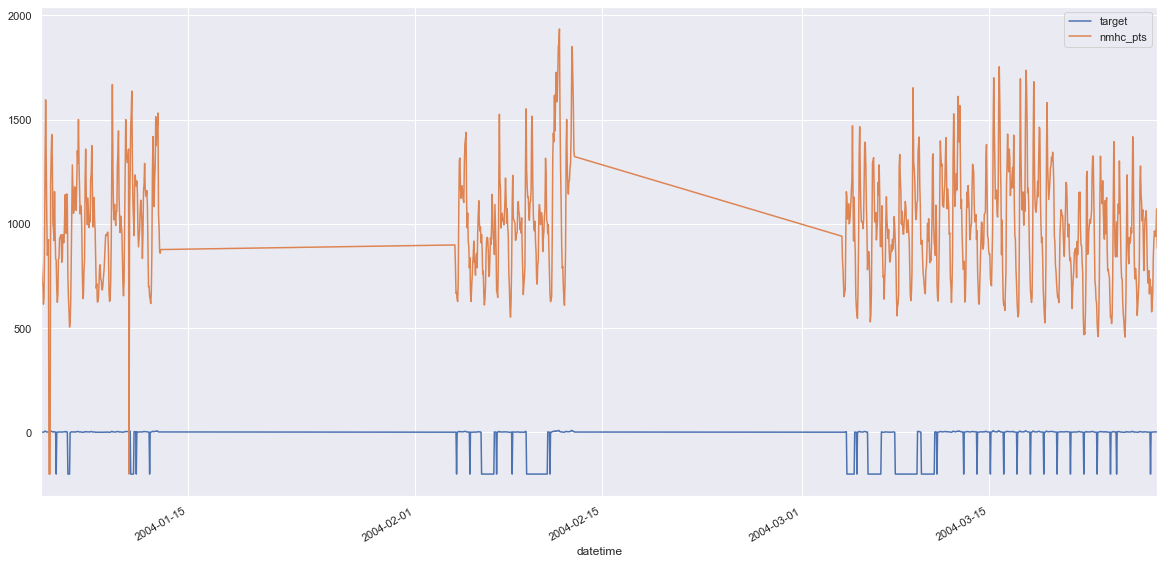

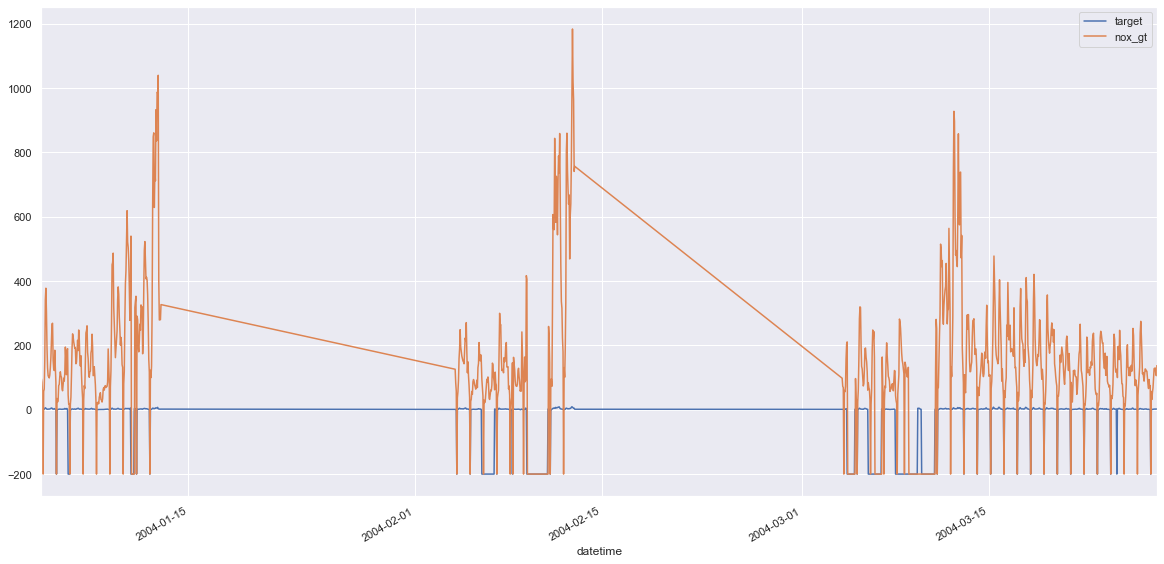

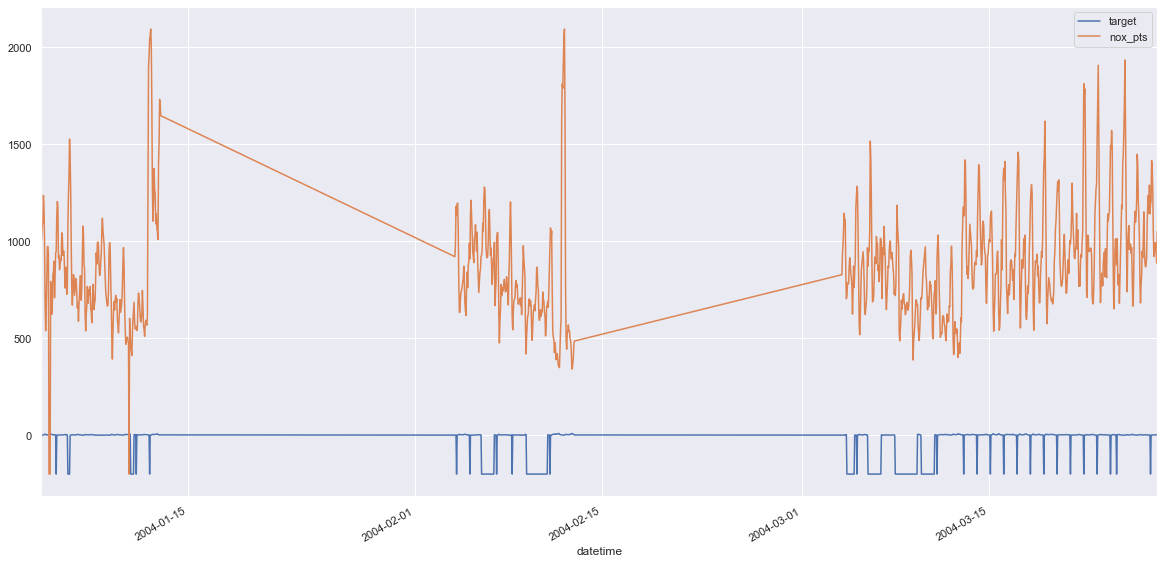

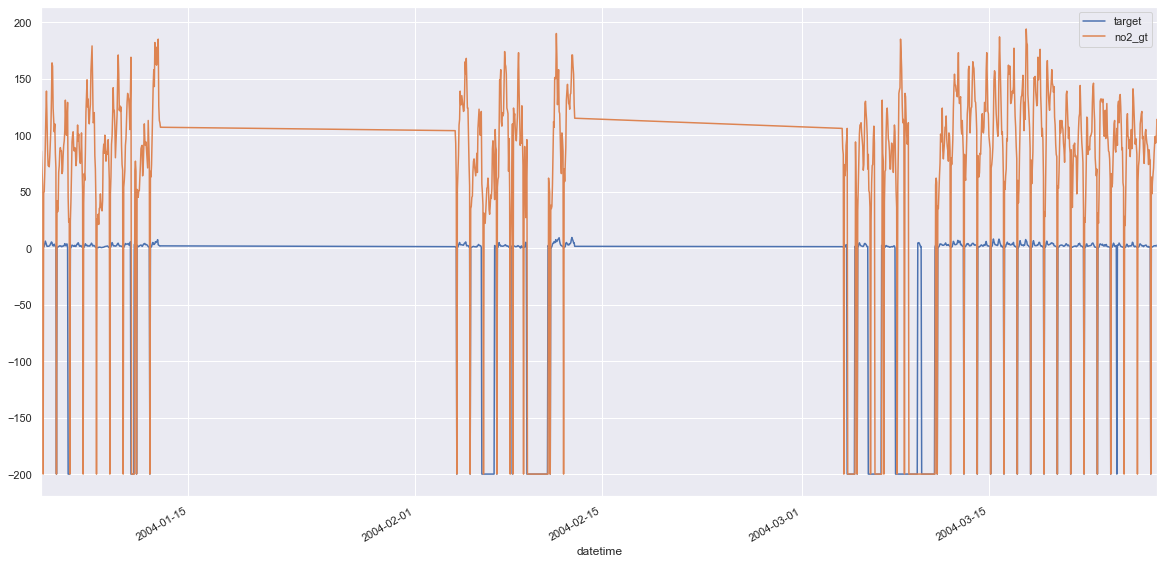

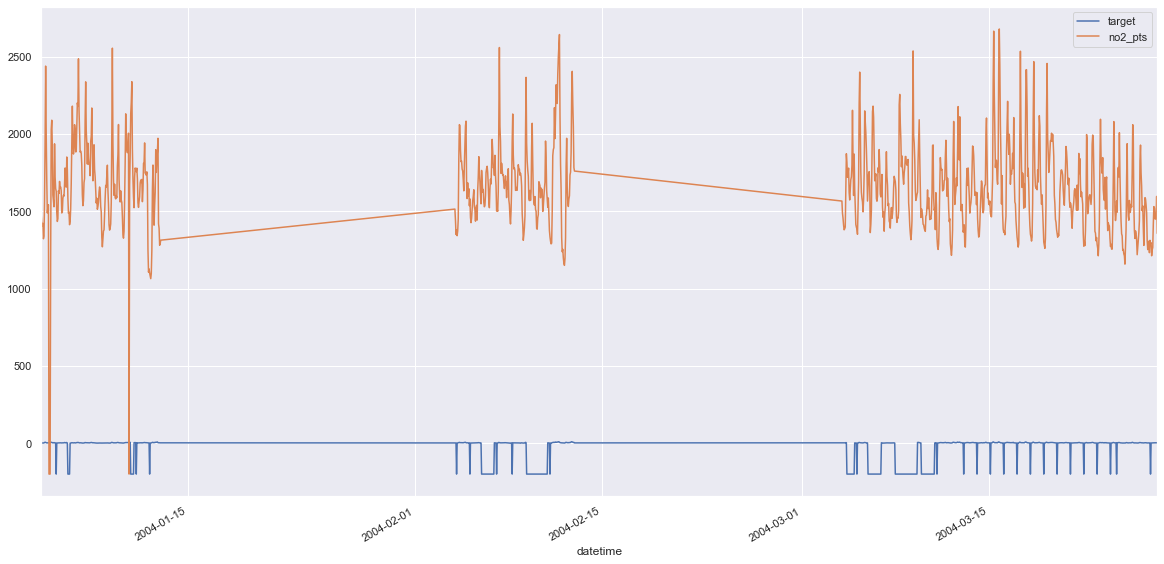

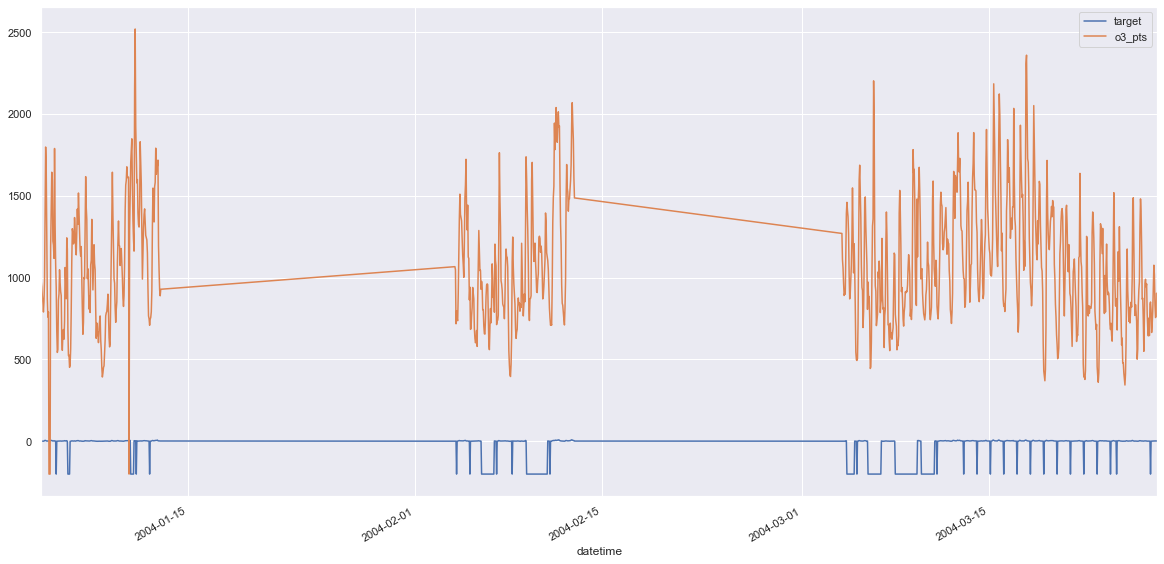

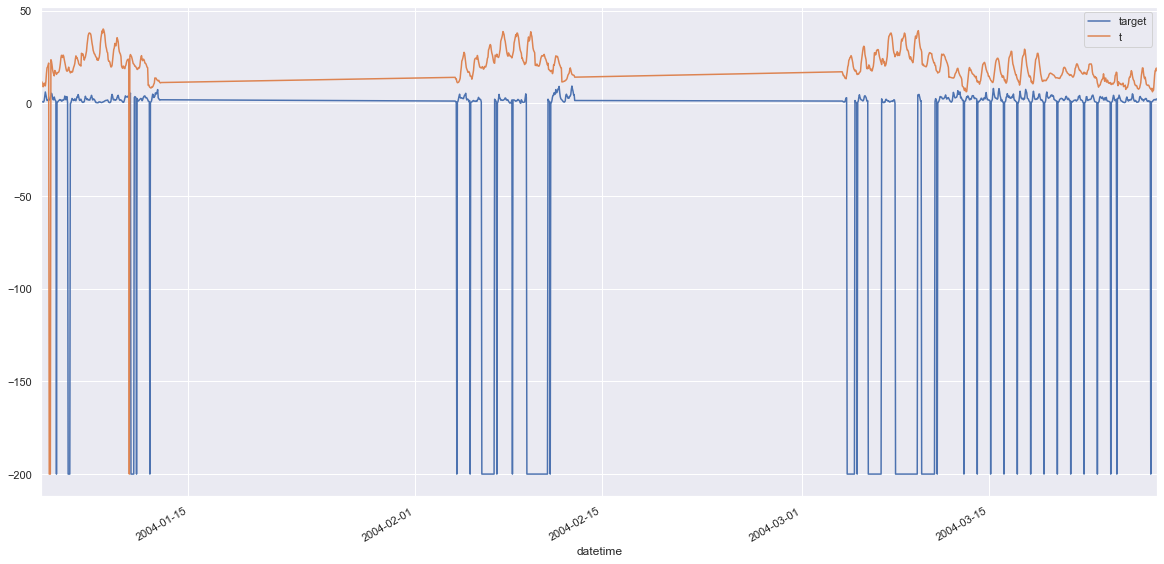

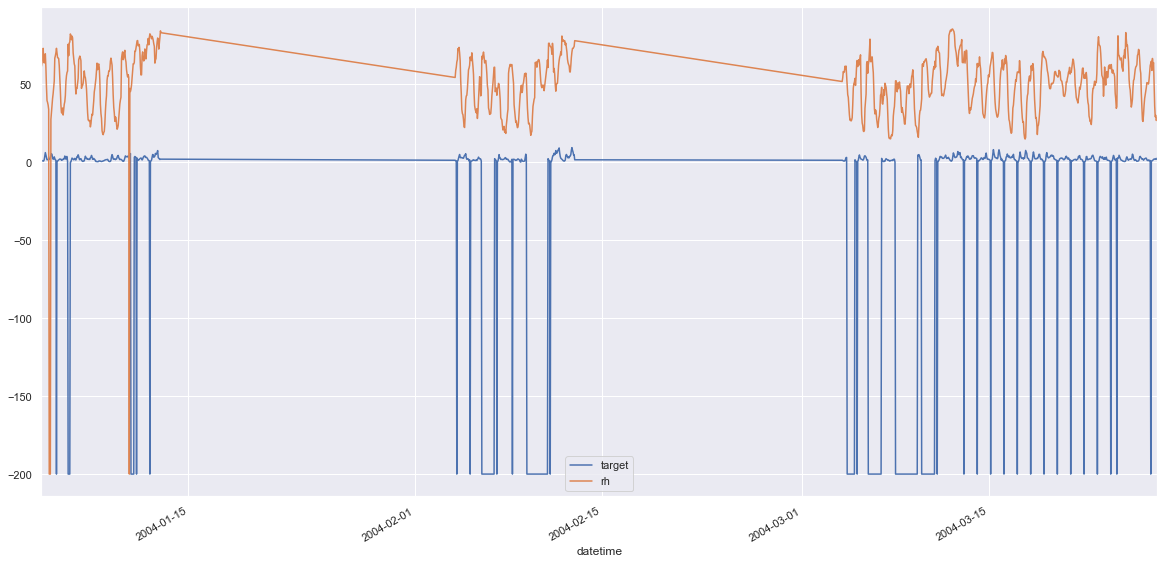

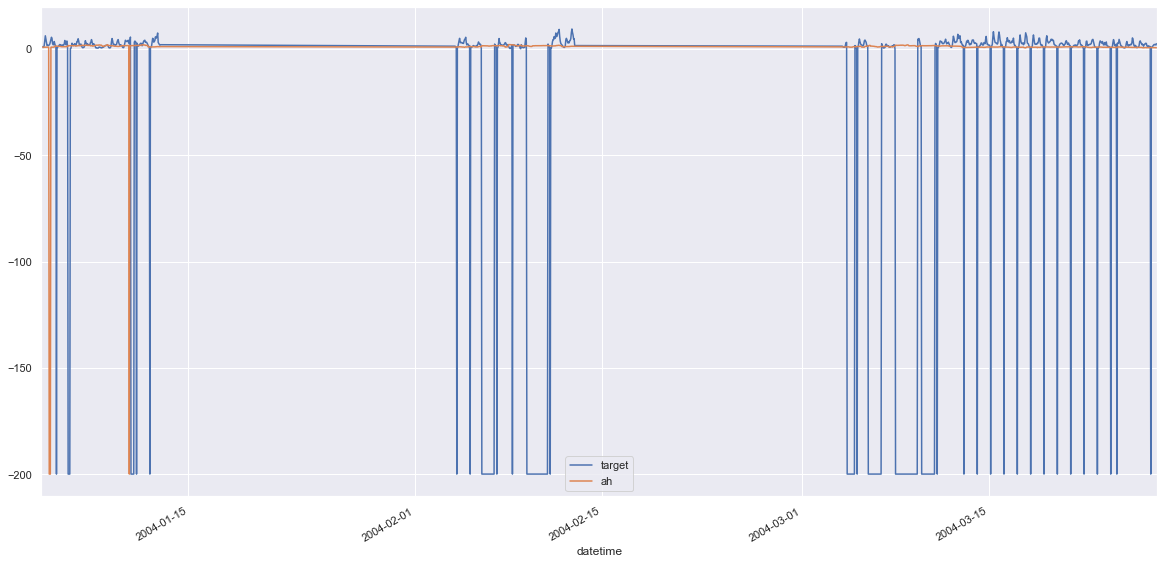

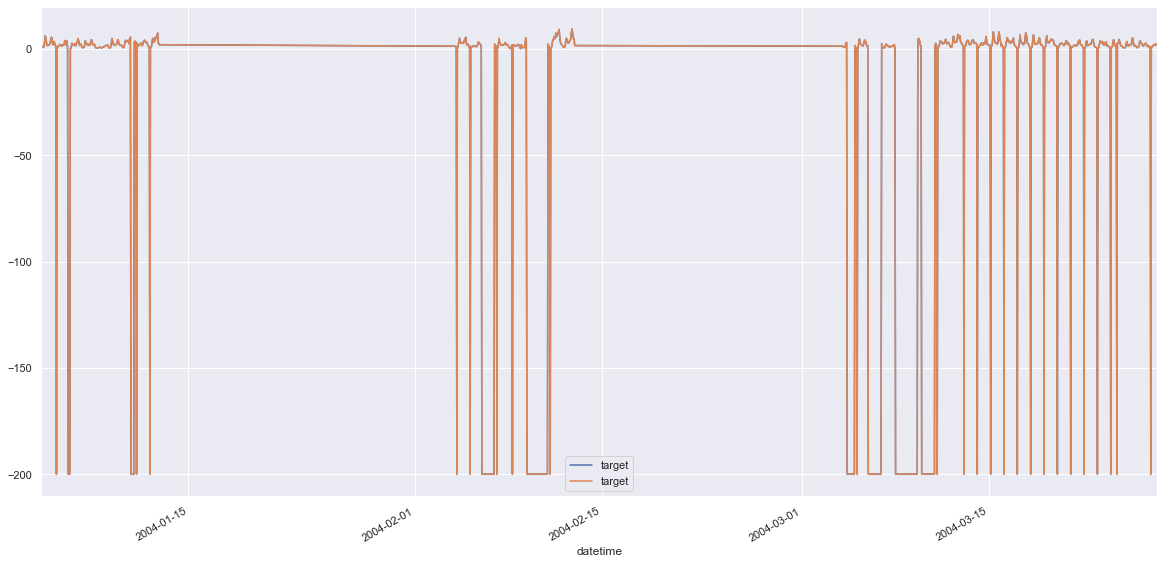

In [60]:
for i in range(len(valid_cols)):
    df[[valid_cols[-1], valid_cols[i]]].iloc[0:1000].plot(kind='line')

# 6. CO2 Concentration Prediction - Machine Learning Regression

In [81]:
df = df.dropna()

In [82]:
X = df.reset_index().sort_values('datetime').drop(columns=['target', 'datetime'])
y = df.reset_index().sort_values('datetime').target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
model.score(X_test, y_test)

0.7875112306257445